In [1]:
class Heap:
    def __init__(self):
        self.items = []

    def parent(self, index):
        return (index - 1) // 2

    def left_child(self, index):
        return 2 * index + 1

    def right_child(self, index):
        return 2 * index + 2

    def has_parent(self, index):
        return self.parent(index) >= 0

    def has_left_child(self, index):
        return self.left_child(index) < len(self.items)

    def has_right_child(self, index):
        return self.right_child(index) < len(self.items)

    def swap(self, index1, index2):
        self.items[index1], self.items[index2] = self.items[index2], self.items[index1]

    def peek(self):
        if not self.items:
            return None

        return self.items[0]

    def push(self, item):
        self.items.append(item)
        self._heapify_up(len(self.items) - 1)

    def pop(self):
        if not self.items:
            return None

        # Swap first and last items, remove last item, and heapify down
        self.swap(0, len(self.items) - 1)
        item = self.items.pop()
        self._heapify_down(0)

        return item

    def _heapify_up(self, index):
        # Compare with parent and swap if necessary until parent is greater or equal
        while self.has_parent(index) and self.items[index] < self.items[self.parent(index)]:
            self.swap(index, self.parent(index))
            index = self.parent(index)

    def _heapify_down(self, index):
        # Compare with children and swap with smaller child until both children are greater or equal
        while self.has_left_child(index):
            smaller_child_index = self.left_child(index)

            if self.has_right_child(index) and self.items[self.right_child(index)] < self.items[smaller_child_index]:
                smaller_child_index = self.right_child(index)

            if self.items[index] < self.items[smaller_child_index]:
                break
            else:
                self.swap(index, smaller_child_index)

            index = smaller_child_index

class Node:
    def __init__(self, freq, char=None):
        self.freq = freq
        self.char = char
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

    def __eq__(self, other):
        return self.freq == other.freq
    def is_leaf(self):
        return self.left is None and self.right is None

def build_huffman_tree(freq_dict):
    # Create a priority queue (min heap) of nodes
    node_heap = Heap()
    for char, freq in freq_dict.items():
        node_heap.push(Node(freq, char=char))

    # Build Huffman tree by merging nodes with lowest frequency
    while len(node_heap.items) > 1:
        left_node = node_heap.pop()
        right_node = node_heap.pop()
        merged_node = Node(left_node.freq + right_node.freq)
        merged_node.left = left_node
        merged_node.right = right_node
        node_heap.push(merged_node)

    # Return root of Huffman tree
    return node_heap.pop()

def generate_huffman_codes(node, code_dict, code=''):
    if node.char:
        code_dict[node.char] = code
    else:
        generate_huffman_codes(node.left, code_dict, code + '0')
        generate_huffman_codes(node.right, code_dict, code + '1')

def huffman_encode(input_str):
    # Calculate frequency of each character in input string
    freq_dict = {}
    for char in input_str:
        freq_dict[char] = freq_dict.get(char, 0) + 1

    # Build Huffman tree and generate Huffman codes
    root_node = build_huffman_tree(freq_dict)
    code_dict = {}
    generate_huffman_codes(root_node, code_dict)

    # Encode input string using Huffman codes
    encoded_str = ''
    for char in input_str:
        encoded_str += code_dict[char]

    # Return encoded string and Huffman tree root node
    return encoded_str, root_node

def huffman_decode(encoded_str, root_node):
    # Decode encoded string using Huffman tree
    decoded_str = ''
    curr_node = root_node
    for bit in encoded_str:
        if bit == '0':
            curr_node = curr_node.left
        else:
            curr_node = curr_node.right

        if curr_node.char:
            decoded_str += curr_node.char
            curr_node = root_node

    return decoded_str

def encode_file (filename):
    with open(filename, 'r') as f :
        data = f.read().splitlines()
    return huffman_encode(" ".join(data))

encoded_str, root_node = encode_file("example.txt")

# Print the encoded string and Huffman tree root node
print("Encoded string: ", encoded_str)

# Decode the encoded string using Huffman decoding
decoded_str = huffman_decode(encoded_str, root_node)

# Print the decoded string
print("Decoded string: ", decoded_str)


Encoded string:  11001101010110111110010100101000111
Decoded string:  hello world 


In [2]:
import graphviz


# Define a function to convert a Huffman tree to a Graphviz graph
def huffman_to_graphviz(root_node):
    def add_node(node, node_id):
        if node.is_leaf():
            label = f"{node.char}\n{node.freq}"
        else:
            label = str(node.freq)
        graph.node(str(node_id), label=label)

        if node.left:
            left_id = len(node_ids)
            node_ids.append(left_id)
            add_node(node.left, left_id)
            graph.edge(str(node_id), str(left_id), label='0')

        if node.right:
            right_id = len(node_ids)
            node_ids.append(right_id)
            add_node(node.right, right_id)
            graph.edge(str(node_id), str(right_id), label='1')

    graph = graphviz.Graph(engine='dot')
    node_ids = [0]
    add_node(root_node, 0)
    return graph



# Define the input string and build the Huffman tree
input_str = 'hello world'
freq_dict = {}
for char in input_str:
    freq_dict[char] = freq_dict.get(char, 0) + 1
root_node = build_huffman_tree(freq_dict)

# Convert the Huffman tree to a Graphviz graph and render it to a PDF file
graph = huffman_to_graphviz(root_node)
graph.render('huffman_tree')


'huffman_tree.pdf'

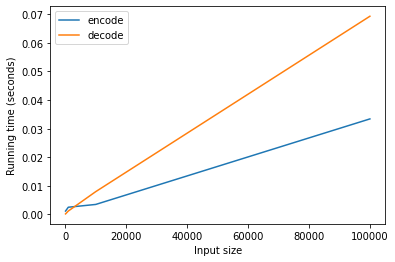

In [12]:
    import random
    import string
    import time
    def generate_random_string(length):
        return ''.join(random.choices(string.ascii_letters + string.digits, k=length))
    def plot_length(length):
        num_runs = 5
        input_length = length
        total_running_time_encode = 0
        total_running_time_decode = 0
        for i in range(num_runs):
            input_str = generate_random_string(input_length)
            start_time1 = time.time()
            encoded_str, tree = huffman_encode(input_str)
            end_time1 = time.time()
            start_time2 = time.time()
            decoded_str = huffman_decode(encoded_str, tree)
            end_time2 = time.time()
            running_time_encode = end_time1 - start_time1
            running_time_decode = end_time2 - start_time2
            total_running_time_encode += running_time_encode
            total_running_time_decode+= running_time_decode
        average_running_time_encode = total_running_time_encode / num_runs
        average_running_time_decode = total_running_time_decode / num_runs
        return average_running_time_encode , average_running_time_decode
    import matplotlib.pyplot as plt

    input_lengths = [100,1000,10000,100000]
    running_times_encode = [plot_length(k)[0] for k in input_lengths]  
    running_times_decode = [plot_length(k)[1] for k in input_lengths] 

    plt.plot(input_lengths, running_times_encode, label = "encode") # plot first line
    plt.plot(input_lengths, running_times_decode,label = "decode") # plot second line
    plt.xlabel('Input size')
    plt.ylabel('Running time (seconds)')
    plt.legend()
    plt.show()